# Car Price Prediction

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Dataset File

In [ ]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/train.csv?raw=true'
df_train = pd.read_csv(dataset_url)

## Test File

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/test.csv?raw=true'
dt=pd.read_csv(test_url)

## Sample Submission

In [ ]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/sample_submission.csv?raw=true'
sf=pd.read_csv(sample_submission_url)

## Load the Dataset

In [ ]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [ ]:
print('The dimension of the train dataset is:', df_train.shape)

The dimension of the train dataset is: (188533, 13)


In [ ]:
dt.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [ ]:
print('The dimension of the train dataset is:', dt.shape)

The dimension of the train dataset is: (125690, 12)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


## Statistical Summary

In [ ]:
df_train.describe(include='all')

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,188533.000000,188533,188533,188533.000000,188533.000000,183450,188533,188533,188533,188533,186081,167114,1.885330e+05
unique,NaN,57,1897,NaN,NaN,7,1117,52,319,156,2,1,NaN
top,NaN,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
freq,NaN,23088,2945,NaN,NaN,165940,3462,49904,48658,107674,144514,167114,NaN
mean,94266.000000,NaN,NaN,2015.829998,65705.295174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.387802e+04
std,54424.933488,NaN,NaN,5.660967,49798.158076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.881952e+04
min,0.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,47133.000000,NaN,NaN,2013.000000,24115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04
50%,94266.000000,NaN,NaN,2017.000000,57785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.082500e+04
75%,141399.000000,NaN,NaN,2020.000000,95400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000e+04


In [ ]:
dt.describe(include='all')

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,125690.000000,125690,125690,125690.000000,125690.000000,122307,125690,125690,125690,125690,124058,111451
unique,NaN,55,1891,NaN,NaN,7,1117,52,317,156,2,1
top,NaN,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,NaN,15265,1923,NaN,NaN,110533,2189,33132,32370,71613,96263,111451
mean,251377.500000,NaN,NaN,2015.797526,66042.581510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,36283.722005,NaN,NaN,5.673797,50223.858435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,188533.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,219955.250000,NaN,NaN,2013.000000,24500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,251377.500000,NaN,NaN,2017.000000,57500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,282799.750000,NaN,NaN,2020.000000,95798.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check for Missing and Duplicated Rows

In [ ]:
df_train.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [ ]:
dt.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,3383
engine,0
transmission,0
ext_col,0
int_col,0


In [ ]:
# Check for duplicated rows in the train DataFrame
num_duplicates_train = sum(df_train.duplicated())
print(f"There are {num_duplicates_train} duplicated rows in the train data frame.")

There are 0 duplicated rows in the train data frame.


In [ ]:
# Check for duplicated rows in the test DataFrame
num_duplicates_test = sum(dt.duplicated())
print(f"There are {num_duplicates_test} duplicated rows in the test data frame.")

There are 0 duplicated rows in the test data frame.


In [ ]:
drop_col=['id','ext_col', 'int_col']
df_train.drop(drop_col, inplace=True, axis=1)
object_columns = df_train.select_dtypes(include=['object']).columns
df_train[object_columns]

,brand,model,fuel_type,engine,transmission,accident,clean_title
0,MINI,Cooper S Base,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,None reported,Yes
1,Lincoln,LS V8,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,At least 1 accident or damage reported,Yes
2,Chevrolet,Silverado 2500 LT,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,None reported,Yes
3,Genesis,G90 5.0 Ultimate,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None reported,Yes
4,Mercedes-Benz,Metris Base,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,None reported,Yes
...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None reported,Yes
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,At least 1 accident or damage reported,Yes
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,None reported,Yes
188531,Audi,S5 3.0T Prestige,Gasoline,3.0L,1-Speed Automatic,None reported,NaN


In [ ]:
for column in object_columns:
    unique_values = df_train[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'brand':
['MINI' 'Lincoln' 'Chevrolet' 'Genesis' 'Mercedes-Benz' 'Audi' 'Ford'
 'BMW' 'Tesla' 'Cadillac' 'Land' 'GMC' 'Toyota' 'Hyundai' 'Volvo'
 'Volkswagen' 'Buick' 'Rivian' 'RAM' 'Hummer' 'Alfa' 'INFINITI' 'Jeep'
 'Porsche' 'McLaren' 'Honda' 'Lexus' 'Dodge' 'Nissan' 'Jaguar' 'Acura'
 'Kia' 'Mitsubishi' 'Rolls-Royce' 'Maserati' 'Pontiac' 'Saturn' 'Bentley'
 'Mazda' 'Subaru' 'Ferrari' 'Aston' 'Lamborghini' 'Chrysler' 'Lucid'
 'Lotus' 'Scion' 'smart' 'Karma' 'Plymouth' 'Suzuki' 'FIAT' 'Saab'
 'Bugatti' 'Mercury' 'Polestar' 'Maybach']

Unique values in 'model':
['Cooper S Base' 'LS V8' 'Silverado 2500 LT' ... 'e-Golf SE'
 'Integra w/A-Spec Tech Package' 'IONIQ Plug-In Hybrid SEL']

Unique values in 'fuel_type':
['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']

Unique values in 'engine':
['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel'
 '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel'
 '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capabil

## Visualizing the Data

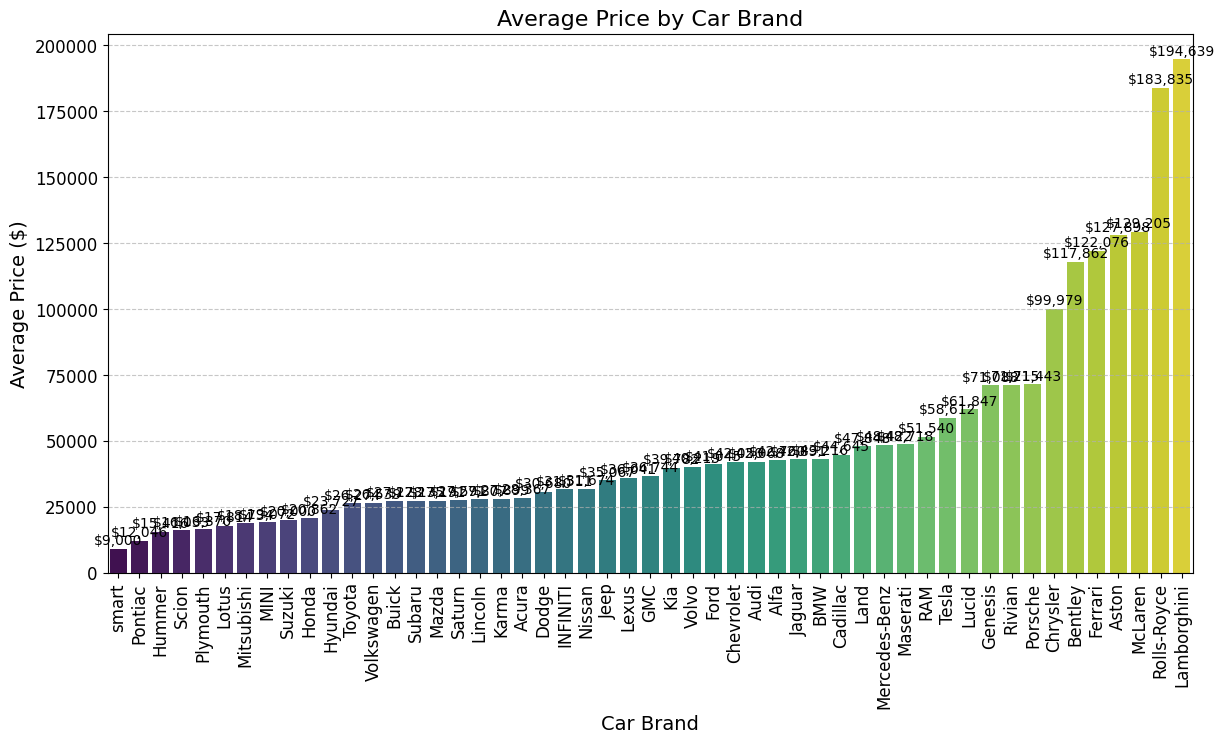

In [ ]:
sorted_data = df_train[:10000].groupby('brand')['price'].mean().reset_index().sort_values(by='price')

palette = sns.color_palette("viridis", n_colors=len(sorted_data))

plt.figure(figsize=(14, 7))

sns.barplot(x='brand', y='price', data=sorted_data, palette=palette, errorbar=None)

plt.title('Average Price by Car Brand', fontsize=16)
plt.xlabel('Car Brand', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(sorted_data['price']):
    plt.text(i, v + 500, f"${v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.show()


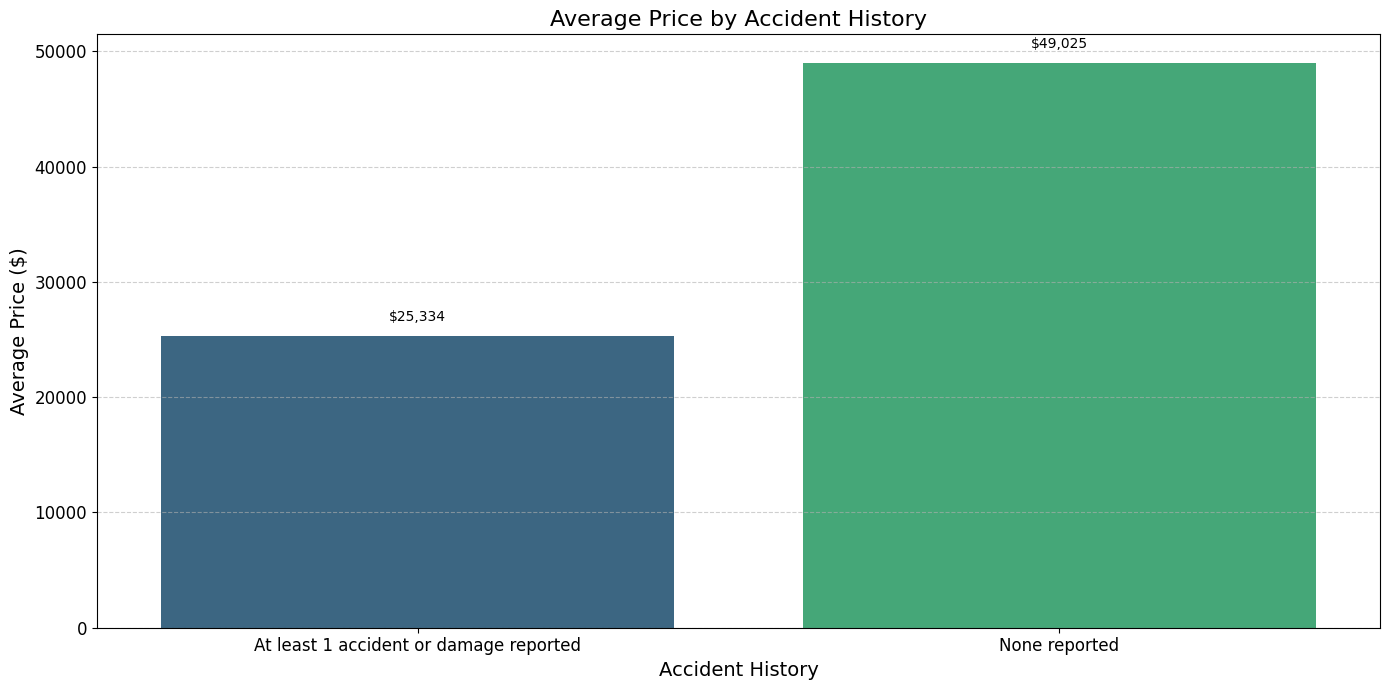

In [ ]:
plt.figure(figsize=(14, 7))

sorted_data = df_train.groupby('accident')['price'].mean().reset_index().sort_values(by='price')

palette = sns.color_palette("viridis", n_colors=len(sorted_data))

sns.barplot(x='accident', y='price', data=sorted_data, palette=palette, errorbar=None)

plt.title('Average Price by Accident History', fontsize=16)
plt.xlabel('Accident History', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.6)

for i, v in enumerate(sorted_data['price']):
    plt.text(i, v + 1000, f"${v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


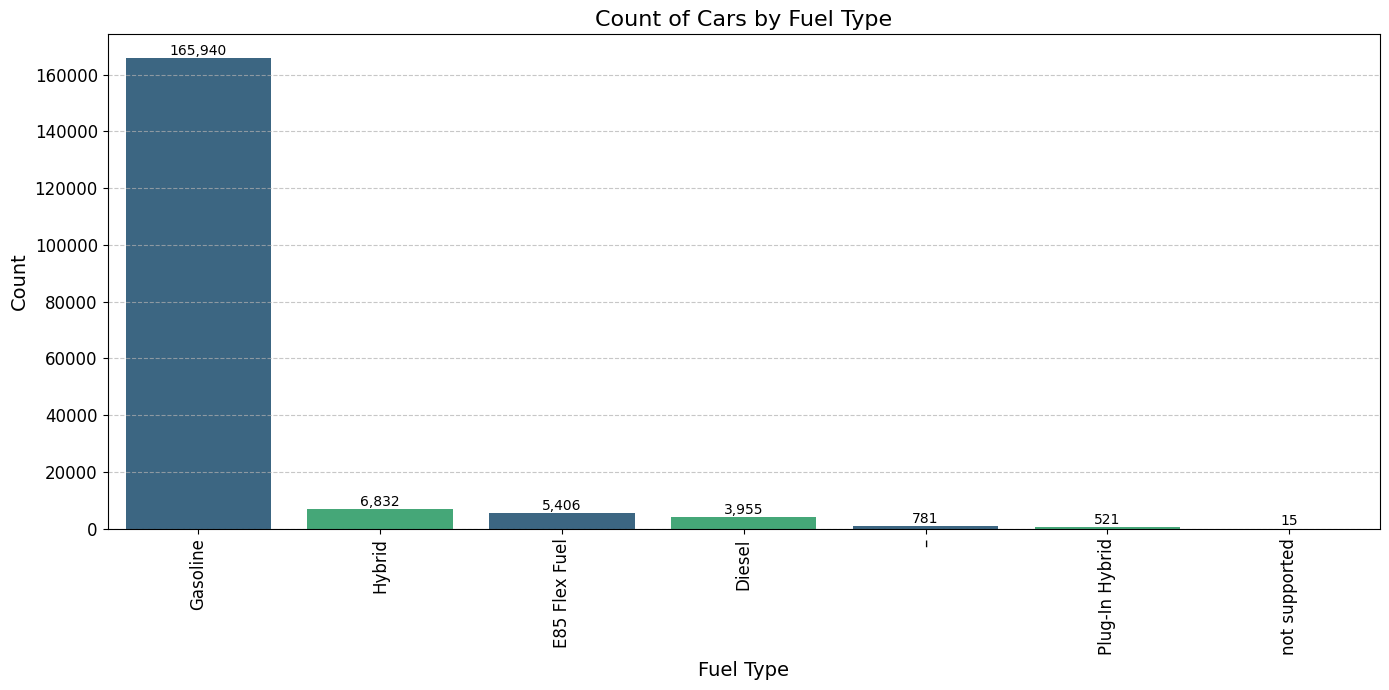

In [ ]:
plt.figure(figsize=(14, 7))

palette = sns.color_palette("viridis", n_colors=len(sorted_data))

fuel_type_order = df_train['fuel_type'].value_counts().index

sns.countplot(x='fuel_type', data=df_train, order=fuel_type_order, palette=palette)

plt.title('Count of Cars by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 50, f'{int(p.get_height()):,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


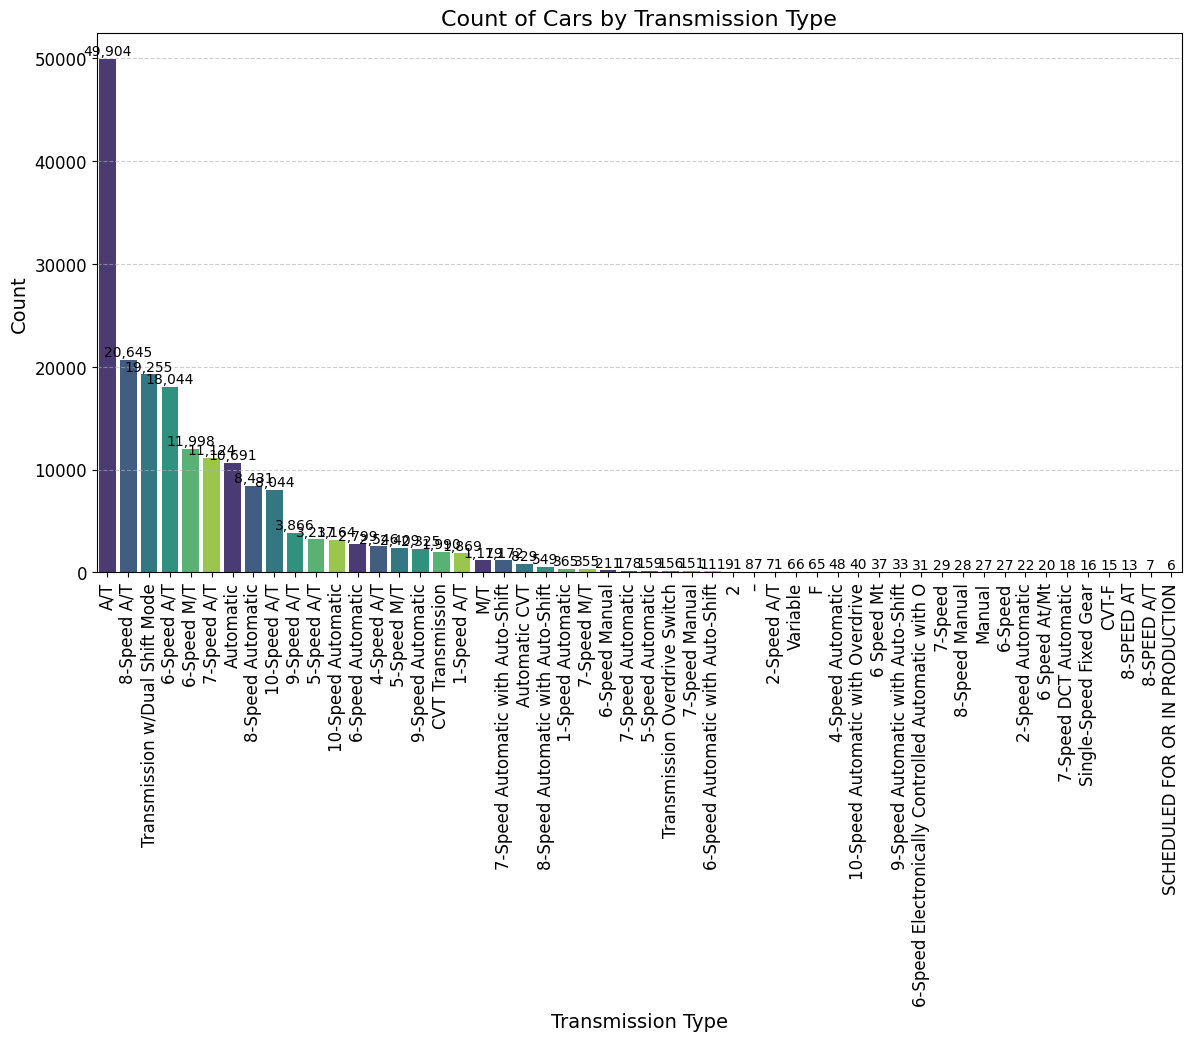

In [ ]:
plt.figure(figsize=(14, 7))

palette = sns.color_palette("viridis")

transmission_order = df_train['transmission'].value_counts().index

sns.countplot(x='transmission', data=df_train, order=transmission_order, palette=palette)

plt.title('Count of Cars by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.6)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 50, f'{int(p.get_height()):,}',
             ha='center', va='bottom', fontsize=10)

plt.show()


## Building the Model

In [ ]:
from datetime import datetime

current_year = datetime.now().year
car_brands = ['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi', 'Ford', 'BMW', 'Cadillac', 'Land',
              'GMC', 'Toyota', 'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'Hummer', 'Alfa', 'INFINITI',
              'Jeep', 'Porsche', 'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Kia', 'Mitsubishi', 'Rolls-Royce',
              'Maserati', 'Pontiac', 'Saturn', 'Bentley', 'Tesla', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Acura',
              'Lamborghini', 'Chrysler', 'RAM', 'McLaren', 'Lucid', 'Lotus', 'Scion', 'Plymouth', 'Suzuki', 'FIAT',
              'Saab', 'Bugatti', 'Mercury', 'Karma', 'Maybach', 'Polestar', 'smart']

luxury_cars = ['Lincoln', 'Genesis', 'Mercedes-Benz', 'Audi', 'BMW', 'Cadillac', 'Volvo', 'Porsche', 'Lexus',
               'Jaguar', 'Rolls-Royce', 'Maserati', 'Bentley', 'Tesla', 'Ferrari', 'Aston', 'Acura', 'Lamborghini',
               'McLaren', 'Lucid', 'Lotus', 'Bugatti', 'Karma', 'Maybach', 'Polestar']

transmissions = ['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T', '8-Speed A/T', '10-Speed Automatic',
                 '1-Speed A/T', '6-Speed A/T', '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic', '9-Speed Automatic',
                 '5-Speed A/T', 'Automatic', '7-Speed Automatic with Auto-Shift', 'CVT Transmission', '5-Speed M/T',
                 'M/T', '6-Speed M/T', '6-Speed Automatic', '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
                 '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T', '6-Speed Manual', 'Transmission Overdrive Switch',
                 '8-Speed Automatic with Auto-Shift', '7-Speed Manual', '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
                 '6-Speed Automatic with Auto-Shift', '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
                 '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt', '5-Speed Automatic', '2-Speed Automatic',
                 '8-SPEED A/T', '7-Speed', 'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT', '10-Speed Automatic with Overdrive',
                 '7-Speed DCT Automatic', 'SCHEDULED FOR OR IN PRODUCTION', '6-Speed', '6 Speed Mt']

automatic_transmissions = ['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T', '8-Speed A/T', '10-Speed Automatic',
                           '1-Speed A/T', '6-Speed A/T', '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic', '9-Speed Automatic',
                           '5-Speed A/T', 'Automatic', '7-Speed Automatic with Auto-Shift', 'CVT Transmission', '6-Speed Automatic',
                           '4-Speed Automatic', '2-Speed A/T', '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
                           '8-Speed Automatic with Auto-Shift', '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
                           '6-Speed Automatic with Auto-Shift', '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
                           '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed', 'Variable', 'Single-Speed Fixed Gear',
                           '8-SPEED AT', '10-Speed Automatic with Overdrive', '7-Speed DCT Automatic']

fuel_types = ['Gasoline', 'E85 Flex Fuel', np.nan, 'Hybrid', 'Diesel', 'Plug-In Hybrid', '–', 'not supported']

fuel_dict = {
    'Gasoline': 1,
    'E85 Flex Fuel': 3,
    'Hybrid': 5,
    'Diesel': 2,
    'Plug-In Hybrid': 4,
    '–': 0,
    'not supported': 0,
    np.nan: 0
}


clean_title_dict = {
    'Yes': 1,
    np.nan: 0
}


engines = [
    '172.0 HP 1.6L 4 Cylinder Engine Gasoline Fuel',
    '252.0 HP 3.9L 8 Cylinder Engine Gasoline Fuel',
    '320.0 HP 5.3L 8 Cylinder Engine Flex Fuel Capability',
    '78.0 HP 1.2L 3 Cylinder Engine Gasoline Fuel',
    '139.0 HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
    '313.0 HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas',
    'Electric Engine',
    'Hybrid Engine'
]

engine_dict = {
    '172.0 HP 1.6L 4 Cylinder Engine Gasoline Fuel': 2,
    '252.0 HP 3.9L 8 Cylinder Engine Gasoline Fuel': 3,
    '320.0 HP 5.3L 8 Cylinder Engine Flex Fuel Capability': 4,
    '78.0 HP 1.2L 3 Cylinder Engine Gasoline Fuel': 1,
    '139.0 HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas': 5,
    '313.0 HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas': 6,
    'Electric': 7,
    'Hybrid': 8
}

df = pd.DataFrame({'Engine': [
    '172.0 HP 1.6L 4 Cylinder Engine Gasoline Fuel',
    '252.0 HP 3.9L 8 Cylinder Engine Gasoline Fuel',
    '320.0 HP 5.3L 8 Cylinder Engine Flex Fuel Capability',
    '78.0 HP 1.2L 3 Cylinder Engine Gasoline Fuel',
    '139.0 HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
    '313.0 HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas',
    'Electric',
    'Hybrid',
    np.nan
]})


transmission_dict = {trans: 1 if trans in automatic_transmissions else 0 for trans in transmissions}
car_dict = {brand: 1 if brand in luxury_cars else 0 for brand in car_brands}
clean_title_values = ['Yes', np.nan]


df_train['engineRank'] = df_train['engine'].map(engine_dict).fillna(0).astype(int)
df_train['cleanTitleValue'] = df_train['clean_title'].map(clean_title_dict).astype(int)
df_train['luxury_brand'] = df_train['brand'].map(car_dict).astype(int)
df_train['fuelValue'] = df_train['fuel_type'].map(fuel_dict).astype(int)
df_train['isAutomatic'] = df_train['transmission'].map(transmission_dict).astype(int)
df_train['model_year'] = df_train['model_year'].astype(int)
df_train['car_age'] = current_year - df_train['model_year']

dt['engineRank'] = dt['engine'].map(engine_dict).fillna(0).astype(int)
dt['cleanTitleValue'] = dt['clean_title'].map(clean_title_dict).astype(int)
dt['luxury_brand'] = dt['brand'].map(car_dict).astype(int)
dt['fuelValue'] = dt['fuel_type'].map(fuel_dict).astype(int)
dt['isAutomatic'] = dt['transmission'].map(transmission_dict).astype(int)
dt['model_year'] = dt['model_year'].astype(int)
dt['car_age'] = current_year - dt['model_year']

In [ ]:
df_train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price,engineRank,cleanTitleValue,luxury_brand,fuelValue,isAutomatic,car_age
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,None reported,Yes,4200,0,1,0,1,1,17
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,At least 1 accident or damage reported,Yes,4999,0,1,1,1,1,22
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,None reported,Yes,13900,0,1,0,3,1,22
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None reported,Yes,45000,0,1,1,1,1,7
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,None reported,Yes,97500,0,1,1,1,1,3


In [ ]:
from sklearn.model_selection import train_test_split

x = df_train.drop(['engineRank','fuelValue','luxury_brand','price','brand','model','fuel_type','engine','transmission','accident','clean_title','model_year'], axis = 1)
y = df_train['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   milage           188533 non-null  int64
 1   cleanTitleValue  188533 non-null  int64
 2   isAutomatic      188533 non-null  int64
 3   car_age          188533 non-null  int64
dtypes: int64(4)
memory usage: 5.8 MB


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [ ]:
train_mse = mean_squared_error(y_train, y_pred_train, squared=False)
test_mse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 78023.58754198528
Testing MSE: 69094.8026263072
Training R2 Score: 0.07926414270523541
Testing R2 Score: 0.09595694308652902


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   brand            188533 non-null  object
 1   model            188533 non-null  object
 2   model_year       188533 non-null  int64 
 3   milage           188533 non-null  int64 
 4   fuel_type        183450 non-null  object
 5   engine           188533 non-null  object
 6   transmission     188533 non-null  object
 7   accident         186081 non-null  object
 8   clean_title      167114 non-null  object
 9   price            188533 non-null  int64 
 10  engineRank       188533 non-null  int64 
 11  cleanTitleValue  188533 non-null  int64 
 12  luxury_brand     188533 non-null  int64 
 13  fuelValue        188533 non-null  int64 
 14  isAutomatic      188533 non-null  int64 
 15  car_age          188533 non-null  int64 
dtypes: int64(9), object(7)
memory usage: 23.0+ MB


In [ ]:
dt.drop(['fuelValue','luxury_brand','engineRank','ext_col','id','int_col','brand','model','fuel_type','engine','transmission','accident','clean_title','model_year'],inplace=True,axis=1)

In [ ]:
dt.info()
dt.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   milage           125690 non-null  int64
 1   cleanTitleValue  125690 non-null  int64
 2   isAutomatic      125690 non-null  int64
 3   car_age          125690 non-null  int64
dtypes: int64(4)
memory usage: 3.8 MB


(125690, 4)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

69094.8026263072

In [ ]:
id = sf.pop('id')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'price': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
